In [248]:
import torch
import torch.nn as nn # for nn.Module
import torch.nn.functional as F # for sigmoid activation function
import numpy as np # for numpy arrays
import matplotlib.pyplot as plt
from torch.autograd import Variable

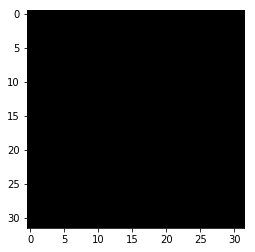

In [249]:
# m x n matrices, m = rows n = cols
# testing out 32x32 with (0,0,0) for RGB values

test1 = np.zeros((32,32,3))
plt.imshow(test1)

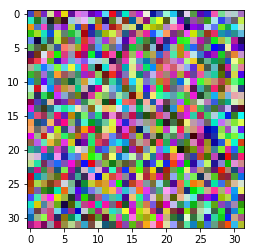

In [250]:
# testing out 32x32 with randomly generated RGB values in each pixel

test2 = np.random.rand(32,32,3)
plt.imshow(test2)

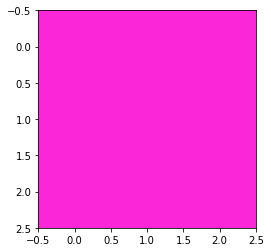

In [274]:
test3_np = np.random.rand(3,3,3)

test3_shape = test3.shape

# converting numpy array to torch tensor - however, for loop breaks
test3_py = torch.from_numpy(test3_np)

for epoch in range(100):
    #r_data = np.random.rand(1)
    #g_data = np.random.rand(1)
    #b_data = np.random.rand(1)
    r_data = torch.rand(1)
    g_data = torch.rand(1)
    b_data = torch.rand(1)
    for r,g,b in zip(r_data, g_data, b_data):
        for i in range(test3_shape[0]):
            for j in range(test3_shape[1]):
                test3[i,j,0] = r
                test3[i,j,1] = g
                test3[i,j,2] = b
    #print (test3)
    #print ("--------------------------------------------")
    
plt.imshow(test3)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


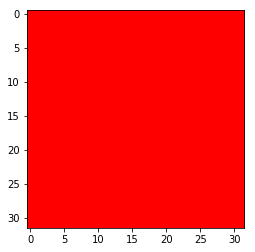

In [252]:
# make red 32x32

red = np.zeros((32,32,3))

red_x_axis = red.shape[0]
red_y_axis = red.shape[1]

for i in range(red_x_axis):
            for j in range(red_y_axis):
                red[i,j,0] = 255
                red[i,j,1] = 0
                red[i,j,2] = 0
                
plt.imshow(red)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


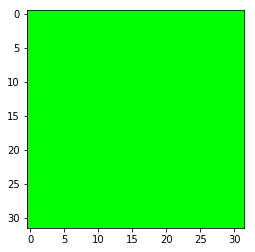

In [253]:
# make green 32x32

green = np.zeros((32,32,3))

green_x_axis = green.shape[0]
green_y_axis = green.shape[1]

for i in range(green_x_axis):
            for j in range(green_y_axis):
                green[i,j,0] = 0
                green[i,j,1] = 255
                green[i,j,2] = 0
                
plt.imshow(green)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


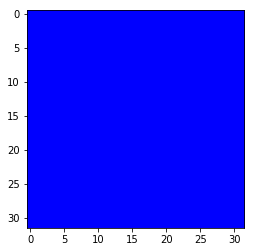

In [254]:
# make blue 32x32

blue = np.zeros((32,32,3))

blue_x_axis = blue.shape[0]
blue_y_axis = blue.shape[1]

for i in range(blue_x_axis):
            for j in range(blue_y_axis):
                blue[i,j,0] = 0
                blue[i,j,1] = 0
                blue[i,j,2] = 255
                
plt.imshow(blue)

blue_torch = torch.from_numpy(blue)

In [297]:
# 0 for white text, 1 for black text
#black, white, red, lime, blue, yellow, cyan, magenta

#x_data = Variable(torch.tensor([[0,0,0],[255,255,255],[255,0,0],[0,255,0],[0,0,255],[255,255,0],[0,255,255],[255,0,255]],dtype=torch.float),requires_grad=True)
#y_data = Variable(torch.tensor([[0],[1],[0],[1],[0],[1],[1],[0]],dtype=torch.float),requires_grad=True)

x_data = Variable(torch.tensor([[0,0,0],[255,255,255],[255,0,0],[0,255,0],[0,0,255],[255,255,0],[0,255,255],[255,0,255]],dtype=torch.float))
y_data = Variable(torch.tensor([[0],[1],[0],[1],[0],[1],[1],[0]],dtype=torch.float))

In [298]:
class Net(nn.Module): # nn.Module is the parent class
    def __init__(self):
        super(Net,self).__init__() # super used to pass arguments of child class to parent class
        self.linear = nn.Linear(3,1) # 32x32 input = 1024
        
    def forward(self,x):
        y_pred = F.sigmoid(self.linear(x)) # wrap linear input with sigmoid
        return y_pred
        
# our model
net = Net()

In [299]:
criterion = torch.nn.BCELoss(size_average=True) # binary cross entropy loss
optimizer = torch.optim.SGD(net.parameters(), lr=0.01) # learning rate 0.01

In [309]:
# training loop

for epoch in range(1000):
    y_pred = net(x_data)
    
    # compute and print loss
    loss = criterion(y_pred,y_data)
    print (epoch, loss.data.item())

    # zero the gradients, perform backward pass, and update the weights
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

# After training
hour_var = Variable(torch.Tensor([[1.0,1.0,1.0]]))
print("predict 1 hour ", 1.0, net(hour_var).data[0][0] > 0.5)
hour_var = Variable(torch.Tensor([[7.0,7.0,7.0]]))
print("predict 7 hours", 7.0, net(hour_var).data[0][0] > 0.5)

0 27.480283737182617
1 27.480337142944336
2 27.480390548706055
3 27.480445861816406
4 27.480499267578125
5 27.480552673339844
6 27.480606079101562
7 27.48065948486328
8 27.480709075927734
9 27.480762481689453
10 27.480815887451172
11 27.48086929321289
12 27.48092269897461
13 27.48097801208496
14 27.48103141784668
15 27.4810848236084
16 27.481136322021484
17 27.481189727783203
18 27.481243133544922
19 27.48129653930664
20 27.48134994506836
21 27.481403350830078
22 27.481456756591797
23 27.481510162353516
24 27.481563568115234
25 27.481616973876953
26 27.481670379638672
27 27.48172378540039
28 27.481773376464844
29 27.481826782226562
30 27.48188018798828
31 27.48193359375
32 27.48198699951172
33 27.482038497924805
34 27.482091903686523
35 27.482145309448242
36 27.48219871520996
37 27.48225212097168
38 27.482303619384766
39 27.482357025146484
40 27.482410430908203
41 27.482463836669922
42 27.48251724243164
43 27.48257064819336
44 27.482624053955078
45 27.482677459716797
46 27.482728958129

638 27.51260757446289
639 27.51265525817871
640 27.51270294189453
641 27.512752532958984
642 27.512798309326172
643 27.512847900390625
644 27.512895584106445
645 27.512943267822266
646 27.51299285888672
647 27.513038635253906
648 27.513090133666992
649 27.51313591003418
650 27.51318359375
651 27.513233184814453
652 27.51327896118164
653 27.513328552246094
654 27.513378143310547
655 27.513423919677734
656 27.513473510742188
657 27.51352310180664
658 27.513568878173828
659 27.51361846923828
660 27.51366424560547
661 27.51371192932129
662 27.513761520385742
663 27.513809204101562
664 27.513856887817383
665 27.513904571533203
666 27.513954162597656
667 27.513999938964844
668 27.514049530029297
669 27.514097213745117
670 27.514144897460938
671 27.514190673828125
672 27.514240264892578
673 27.51428985595703
674 27.51433563232422
675 27.514385223388672
676 27.514432907104492
677 27.51447868347168
678 27.5145263671875
679 27.514575958251953
680 27.514625549316406
681 27.514671325683594
682 27.